# Task 3: Correlation Between News and Stock Movement
#### Overview
In this task, the goal is to analyze the correlation between news headlines and stock price movements. This involves aligning news data with stock price data, performing sentiment analysis on the news, and calculating daily stock returns to measure their correlation.

In [1]:
# Import necessary libraries and modules
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.correlation_analysis import Corr_analysis

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
financial_data_path = '../data/processed_financial_news.csv'
stock_data_path = '../data/processed_stock_data.csv'

# Create an instance of the CorrelationAnalysis class
correlation_analysis = Corr_analysis(financial_data_path, stock_data_path)

# Load the data
financial_data, stock_data = correlation_analysis.load_data()

In [3]:
financial_data.head()

,headline,url,publisher,date,stock,headline_length,publication_date,day_of_week,sentiment,sentiment_category,publication_hour,domain
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05,Friday,0.000,Neutral,10,Benzinga Insights
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03,Wednesday,0.000,Neutral,10,Benzinga Insights
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26,Tuesday,0.000,Neutral,4,Lisa Levin
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22,Friday,0.000,Neutral,12,Lisa Levin
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22,Friday,0.296,Positive,11,Vick Meyer


In [4]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [5]:
# Prepare the data
merged_data = correlation_analysis.prepare_data()
merged_data.head()

,publication_date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol,Daily Returns
0,2011-03-03,NVDA,-0.5719,2011-03-03,0.53075,0.53375,0.50600,0.52175,0.478563,1593704000,0.0,0.0,NVDA,0.005783
1,2011-03-07,NVDA,-0.2903,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.0,0.0,NVDA,-0.013969
2,2011-03-08,NVDA,0.0234,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.0,0.0,NVDA,-0.044944
3,2011-03-09,NVDA,0.0000,2011-03-09,0.48725,0.49200,0.47425,0.47850,0.438893,1318976000,0.0,0.0,NVDA,-0.020972
4,2011-03-10,NVDA,0.2023,2011-03-10,0.46750,0.47100,0.44750,0.44800,0.410918,1722736000,0.0,0.0,NVDA,-0.063741


In [6]:
merged_data.shape

(1796, 14)

In [7]:
# Calculate the correlation
corr_result = correlation_analysis.calculate_correlation()

# Display the correlation results
print(corr_result)

stock_symbol
AAPL    0.089157
AMZN    0.162847
GOOG    0.186945
NVDA    0.212913
TSLA    0.162896
dtype: float64


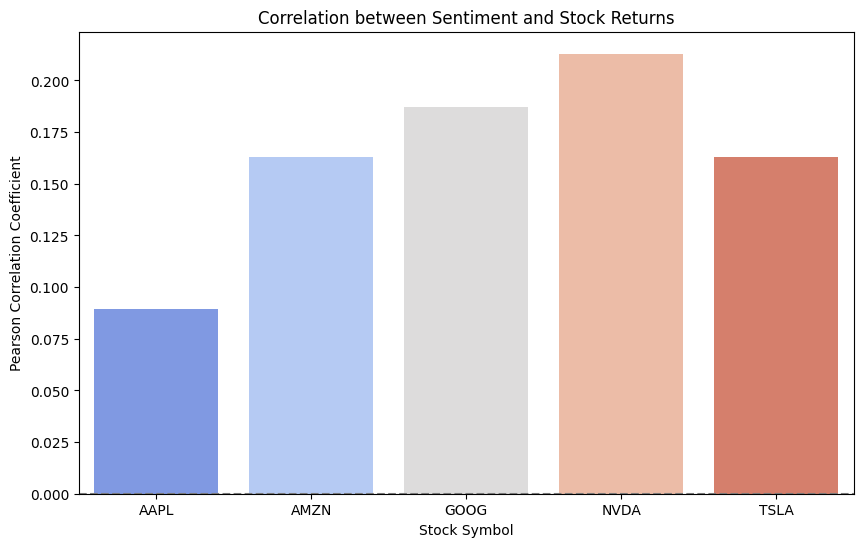

In [8]:
# Plot the correlation
correlation_analysis.plot_correlation(corr_result)

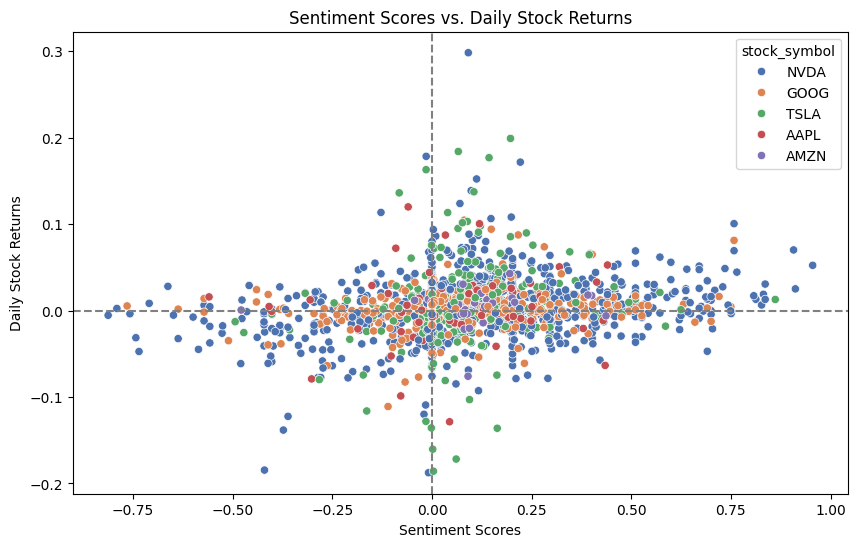

In [9]:
correlation_analysis.scatter_plot()